In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Sample data
data = {
    'advertising_spend': [100, 200, 300, 400, 500],
    'sales': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Add a constant to the independent variable
X = sm.add_constant(df['advertising_spend'])
y = df['sales']

# Fit the model
model = sm.OLS(y, X)
result = model.fit()
# Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.132e+31
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.79e-47
Time:                        07:58:24   Log-Likelihood:                 159.14
No. Observations:                   5   AIC:                            -314.3
Df Residuals:                       3   BIC:                            -315.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0000   4.93e-1

In [43]:
test = pd.DataFrame([230, 260, 300, 350, 400], columns=['spend'])
Z = sm.add_constant(test['spend'])

In [40]:
result.predict(Z)

0    17.5
1    18.0
2    20.0
3    22.5
4    25.0
dtype: float64

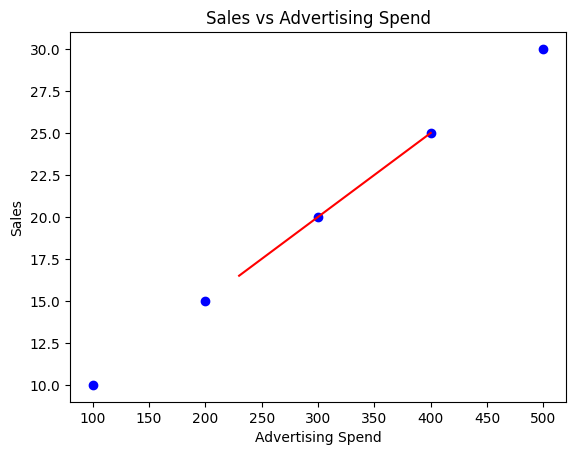

In [44]:
# Plotting the results

plt.scatter(df['advertising_spend'], df['sales'], color='blue')
plt.plot(test['spend'],result.predict(Z), color='red')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.title('Sales vs Advertising Spend')
plt.show()

## Time Series Analysis

ARIMA : Autoregressive Integrated Moving Average

for Time-Series Forecasting

In [54]:
# Generate sample time series data
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods=24, freq='M')
sales = np.random.randint(100, 200, size=len(dates))
df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

df

,Sales
Date,
2020-01-31,144
2020-02-29,147
2020-03-31,164
2020-04-30,167
2020-05-31,167
2020-06-30,109
2020-07-31,183
2020-08-31,121
2020-09-30,136


In [ ]:
# Fit an ARIMA model
model = sm.tsa.ARIMA(df['Sales'], order=(1, 1, 1))
results = model.fit()
results.summary()

In [ ]:
# Forecast
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start='2022-01-01', periods=12, freq='M')
forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index)
forecast_df.columns = ['Forecast']
forecast_df

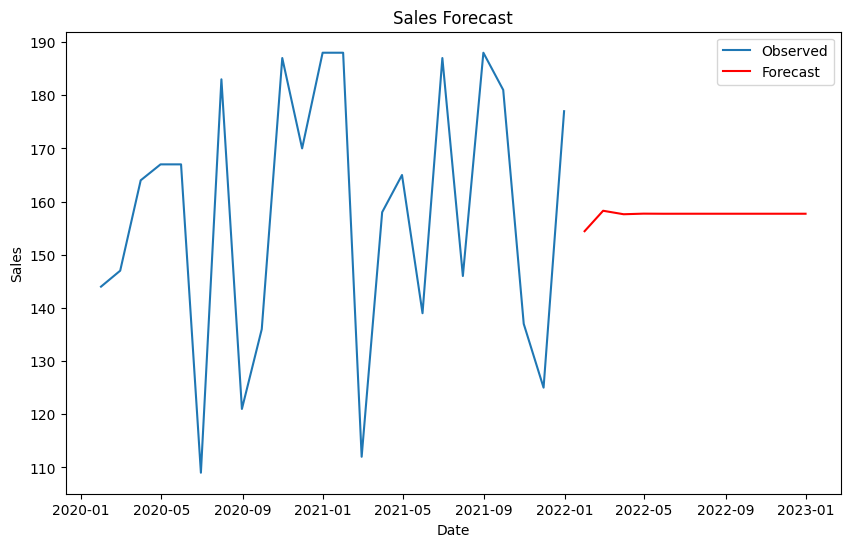

In [73]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Sales'], label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()